# 🏏EDA ON IPL DATA OF 2008-2024

# The Indian Premier League (IPL) is not just a cricket tournament—it is a massive dataset of human decisions, team strategies, player performance, pressure moments, and match situations.



With two datasets (matches and deliveries), we attempt to answer:

Which teams dominate and why?

Do toss decisions matter?

Which batsmen and bowlers create maximum match impact?

How do overs, match situations, and pressure affect runs and wickets?

This storytelling converts raw numbers → meaningful cricket insights.

# Importing Libraries — Setting Up Our Toolkit
Just like a cricket team gathers its bats, balls, and protective gear before stepping onto the field,
a data analyst gathers the essential Python libraries before diving into the game of data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


# 1. Loading the Datasets — Bringing IPL to Life
Here is the moment where IPL’s hidden patterns begin to surface.
With just two lines of code, thousands of balls, hundreds of matches,
and countless thrilling moments of cricket load into our environment — ready to be explored.

In [2]:
deliveries = pd.read_csv("C:\\Users\\hp\\Downloads\\IPL-data-analysis-main\\deliveries.csv")
matches=pd.read_csv("C:\\Users\\hp\\Downloads\\IPL-data-analysis-main\\matches.csv")

In [3]:
matches.columns, deliveries.columns

(Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
        'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
        'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
        'method', 'umpire1', 'umpire2'],
       dtype='object'),
 Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
        'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
        'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
        'dismissal_kind', 'fielder'],
       dtype='object'))

In [4]:
matches.shape

(1095, 20)

In [5]:
deliveries.shape

(260920, 17)

In [6]:
deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [7]:
matches.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


# Data Types and Structure

In [8]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

# This dataset summarizes 1,095 IPL matches, capturing:

Who played

When & where they played

Toss decision

Match winner & margin

Player of the match

Special conditions (super over, DLS)

In [9]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

# Deliveries Dataset — “What Happened Ball by Ball?”

This dataset contains 260,920 deliveries, showing:

Bowler, batsman, non-striker

Runs scored (bat + extras)

Wickets & dismissal types

Over-by-over progression

Pressure moments and scoring patterns

# 2 . Cleaning the Matches Dataset
Missing city

Missing player_of_match

Missing winner

Missing result_margin, target_runs, target_overs

A column (method) with almost all missing values

#### Convert date column to datetime

In [10]:
matches['date'] = pd.to_datetime(matches['date'])

#### Fill missing ‘city’ using venue

In [11]:
matches['city'] = matches['city'].fillna(matches['venue'].apply(lambda x: x.split(',')[0]))
matches['city'] = matches['city'].fillna("Unknown")

#### Fill missing player_of_match

In [12]:
matches['player_of_match'] = matches['player_of_match'].fillna("No Award")

In [13]:
matches['result_margin'] = matches['result_margin'].fillna(0)

#### Drop “method” column (too many missing values)

In [14]:
matches.drop(columns=['method'], inplace=True)

In [15]:
matches['target_runs'] = matches['target_runs'].fillna(0).astype(int)
matches['target_overs'] = matches['target_overs'].fillna(0).astype(int)

# Cleaning the Deliveries Dataset
Missing extras_type

Missing player_dismissed

Missing dismissal_kind

Missing fielder

These are expected because most balls don't produce extras or wickets.

#### Fill missing extras_type with “None”

In [16]:
deliveries['extras_type'] = deliveries['extras_type'].fillna("None")

In [17]:
deliveries['player_dismissed'] = deliveries['player_dismissed'].fillna("Not Out")
deliveries['dismissal_kind'] = deliveries['dismissal_kind'].fillna("None")
deliveries['fielder'] = deliveries['fielder'].fillna("None")

In [18]:
deliveries = deliveries.dropna(subset=['batting_team', 'bowling_team'])

In [19]:
delivery_int_cols = ['match_id', 'inning', 'over', 'ball', 'batsman_runs', 'extra_runs', 'total_runs', 'is_wicket']
deliveries[delivery_int_cols] = deliveries[delivery_int_cols].astype(int)

#### Standardize team names

In [20]:
team_map = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Rising Pune Supergiant': 'Rising Pune Supergiants'
}

matches['team1'] = matches['team1'].replace(team_map)
matches['team2'] = matches['team2'].replace(team_map)
matches['winner'] = matches['winner'].replace(team_map)

deliveries['batting_team'] = deliveries['batting_team'].replace(team_map)
deliveries['bowling_team'] = deliveries['bowling_team'].replace(team_map)

In [21]:
matches.replace({'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'}, inplace=True)
deliveries.replace({'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'}, inplace=True)

### Remove duplicate rows

In [22]:
matches.drop_duplicates(inplace=True)
deliveries.drop_duplicates(inplace=True)

In [23]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   season           1095 non-null   object        
 2   city             1095 non-null   object        
 3   date             1095 non-null   datetime64[ns]
 4   match_type       1095 non-null   object        
 5   player_of_match  1095 non-null   object        
 6   venue            1095 non-null   object        
 7   team1            1095 non-null   object        
 8   team2            1095 non-null   object        
 9   toss_winner      1095 non-null   object        
 10  toss_decision    1095 non-null   object        
 11  winner           1090 non-null   object        
 12  result           1095 non-null   object        
 13  result_margin    1095 non-null   float64       
 14  target_runs      1095 non-null   int32  

In [24]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,223,20,N,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241,20,N,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130,20,N,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5.0,166,20,N,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111,20,N,BF Bowden,K Hariharan


In [25]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int32 
 1   inning            260920 non-null  int32 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int32 
 5   ball              260920 non-null  int32 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int32 
 10  extra_runs        260920 non-null  int32 
 11  total_runs        260920 non-null  int32 
 12  extras_type       260920 non-null  object
 13  is_wicket         260920 non-null  int32 
 14  player_dismissed  260920 non-null  object
 15  dismissal_kind    260920 non-null  object
 16  fielder           260920 non-null  obj

In [26]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,Not Out,None,None
1,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,None,0,Not Out,None,None
2,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,Not Out,None,None
3,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,None,0,Not Out,None,None
4,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,None,0,Not Out,None,None


# 3.Outliers Treatment 

### “Not All Outliers Are Mistakes”

In typical business datasets, outliers often represent errors: wrong entries, data corruption, or rare anomalies.
But cricket is different.

Cricket is a game of extremes:

A batsman hits 6 runs in one ball.

A bowler concedes 20+ runs in one over.

A team wins by 120 runs.

A last-over collapse changes everything.

These are not errors — they are the moments that define IPL drama.

So, before treating outliers, we ask:

“Is this number an error, or is it a real cricket moment?”

This mindset guides our entire outlier strategy.

## 3.1 Outlier Treatment for MATCHES Dataset
The matches dataset contains numeric fields like:

result_margin, target_runs, target_overs

These values can become extremely large because of:

DLS method, Rain-interrupted matches, One-sided games, Super over cases

But some extremely high values may also be data distortions and can skew visualizations.

So for matches dataset, we keep valid cricket values but cap extreme distortions.

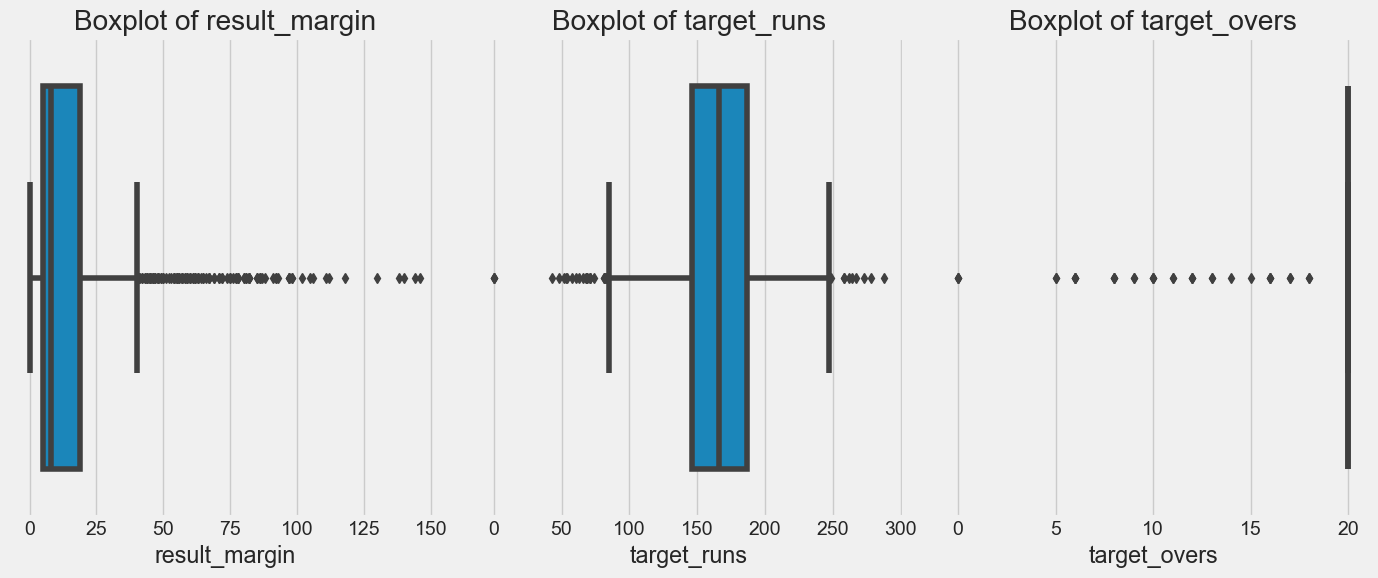

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols_matches = ['result_margin', 'target_runs', 'target_overs']

plt.figure(figsize=(14,6))

for i, col in enumerate(numeric_cols_matches, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=matches[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [28]:
# Function for capping
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] > upper, upper,
                   np.where(df[column] < lower, lower, df[column]))
    return df

matches = cap_outliers(matches, 'result_margin')
matches = cap_outliers(matches, 'target_runs')
matches = cap_outliers(matches, 'target_overs')


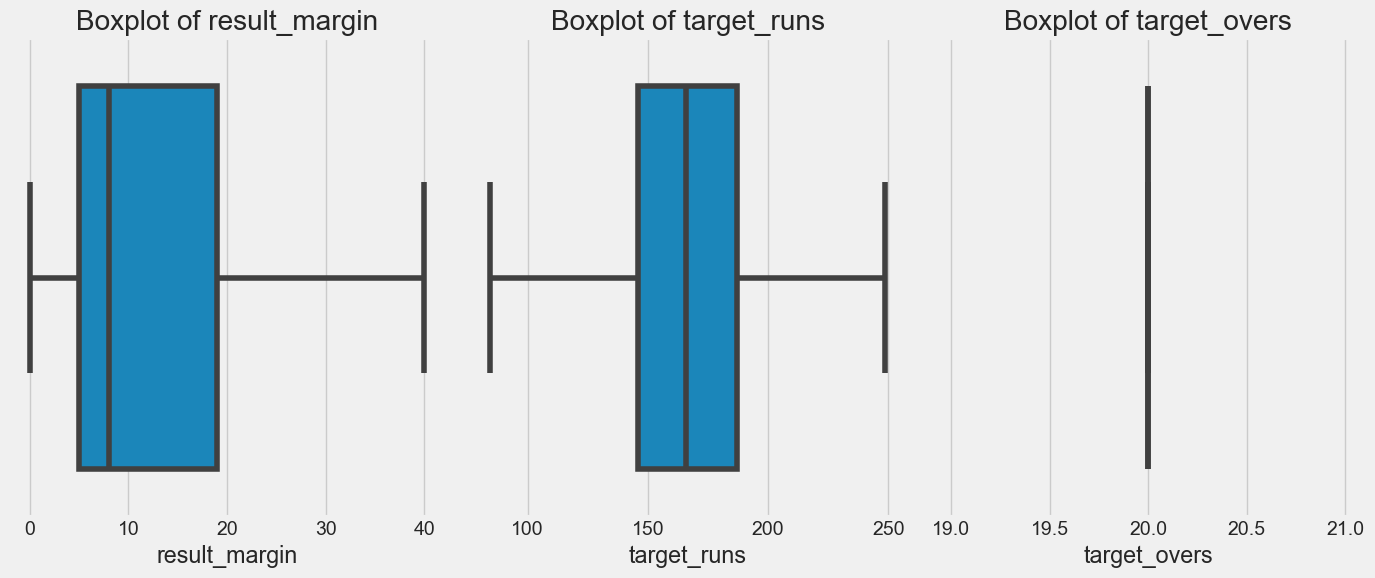

In [29]:
plt.figure(figsize=(14,6))

for i, col in enumerate(numeric_cols_matches, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=matches[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


# 3.2 Outlier Treatment for DELIVERIES Dataset
Deliveries dataset is ball-by-ball and contains fields like:

batsman_runs, total_runs, extra_runs

In cricket:
Maximum batsman_runs per ball = 6
Maximum total_runs per ball = 7 (6 + no-ball extra)
Extra_runs like wides/no-balls can naturally spike

Most “outliers” here are valid cricket events, not errors.

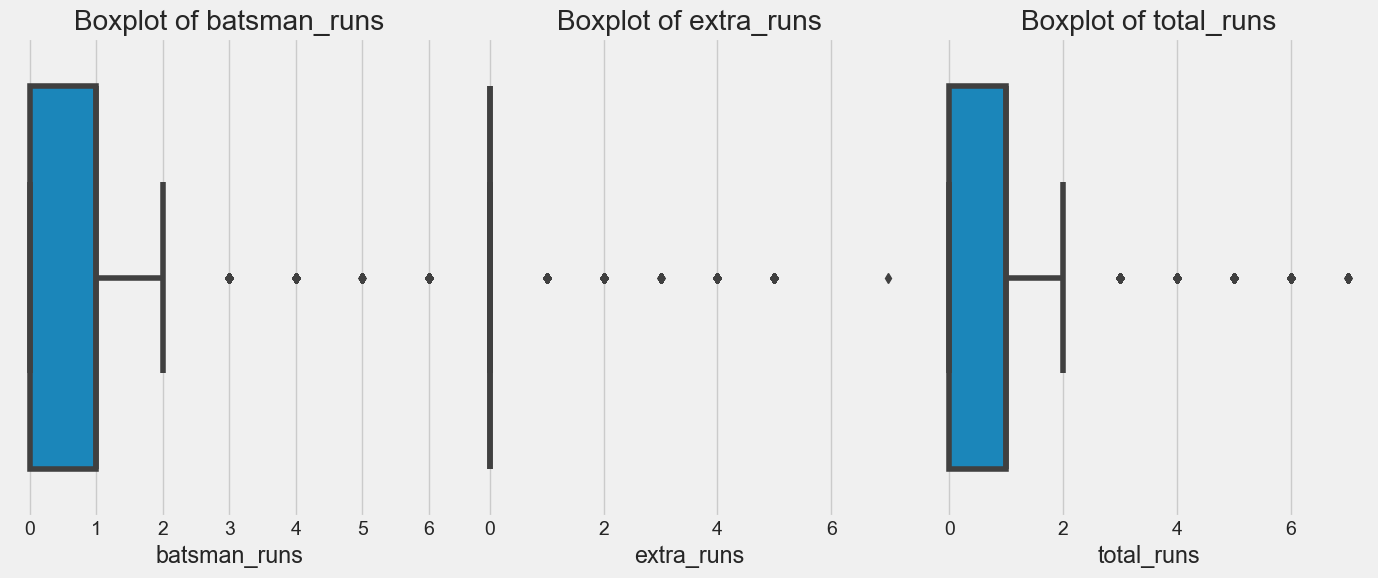

In [33]:
numeric_cols = ['batsman_runs', 'extra_runs', 'total_runs']

plt.figure(figsize=(14,6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=deliveries[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [34]:
deliveries[deliveries['batsman_runs'] > 6]
deliveries[deliveries['total_runs'] > 7]


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder


In [35]:
deliveries[
    (deliveries['batsman_runs'] < 0) |
    (deliveries['total_runs'] < 0) |
    (deliveries['extra_runs'] < 0)
]


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder


In [36]:
deliveries['batsman_runs'] = deliveries['batsman_runs'].clip(0, 6)
deliveries['total_runs'] = deliveries['total_runs'].clip(0, 7)
deliveries['extra_runs'] = deliveries['extra_runs'].clip(lower=0)

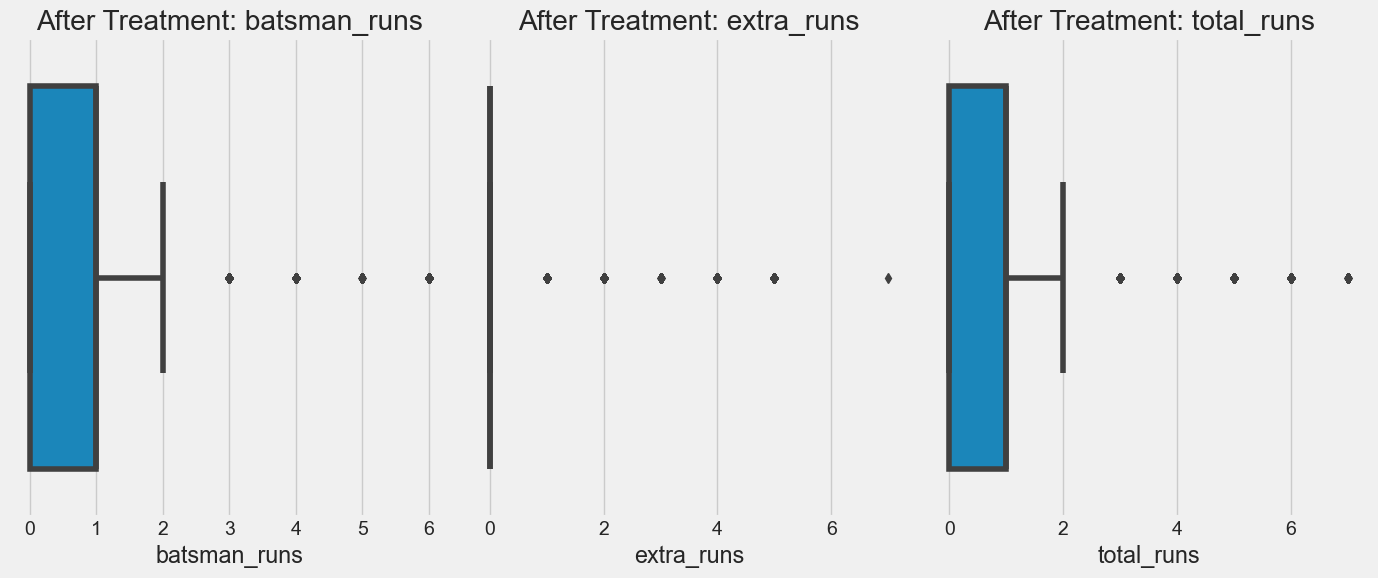

In [37]:
plt.figure(figsize=(14,6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=deliveries[col])
    plt.title(f'After Treatment: {col}')

plt.tight_layout()
plt.show()


## Outlier detection for the deliveries dataset was performed using boxplots, which highlighted statistical extremes in batsman runs, total runs, and extra runs.
However, most of these outliers represented real cricket events such as sixes, no-ball + six combinations, and multiple wides.
Therefore, instead of removing or capping them, we validated each column against the rules of cricket.
Only impossible values—such as batsman runs exceeding six, total runs exceeding seven, or negative runs—were corrected.
This ensures that the dataset preserves all meaningful IPL moments while maintaining data accuracy for further analysis.

# 4. UNIVARIATE ANALYSIS FOR MATCHES DATASET
Columns to analyze:
season, city, venue, toss_decision, winner, result_margin (numeric), match_type,player_of_match

### Season-wise match count

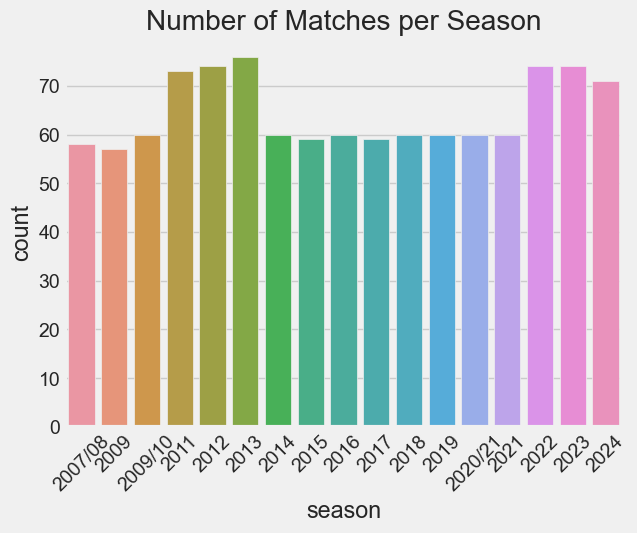

In [38]:
sns.countplot(data=matches, x='season')
plt.xticks(rotation=45)
plt.title("Number of Matches per Season")
plt.show()

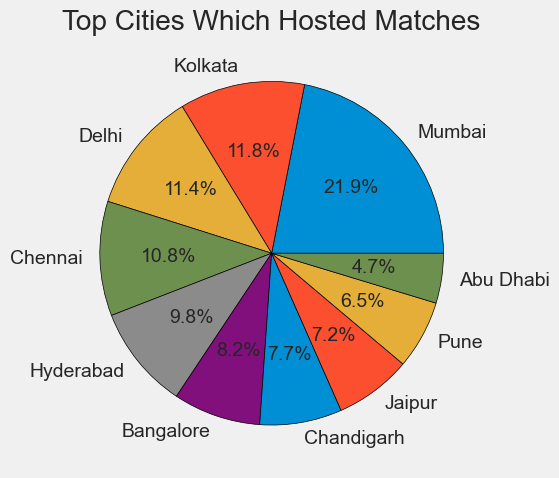

In [98]:
top_cities=matches['city'].value_counts().reset_index(name='Match Count')[:10]
plt.figure(figsize=(6,5))
plt.pie(top_cities['Match Count'], 
        labels=top_cities['city'],
        autopct='%1.1f%%',
        wedgeprops=dict(edgecolor='black'))
plt.title('Top Cities Which Hosted Matches')
plt.tight_layout()
plt.show()

## Most successful teams

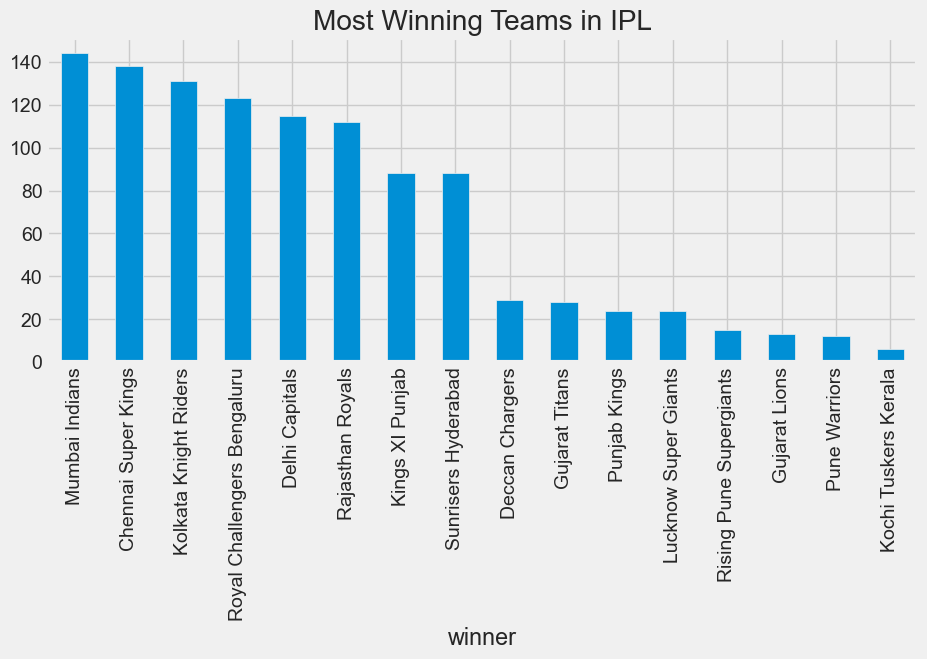

In [39]:
matches['winner'].value_counts().plot(kind='bar', figsize=(10,4))
plt.title("Most Winning Teams in IPL")
plt.show()

In [52]:
matches_won= matches['winner'].value_counts()
matches_played=matches['team1'].value_counts() + matches['team2'].value_counts()
matches_played.sort_values(ascending=False)
success_rates=(matches_won/matches_played)*100
success_rates.sort_values(ascending = False)
success_rates_descending=success_rates.sort_values(ascending=False)

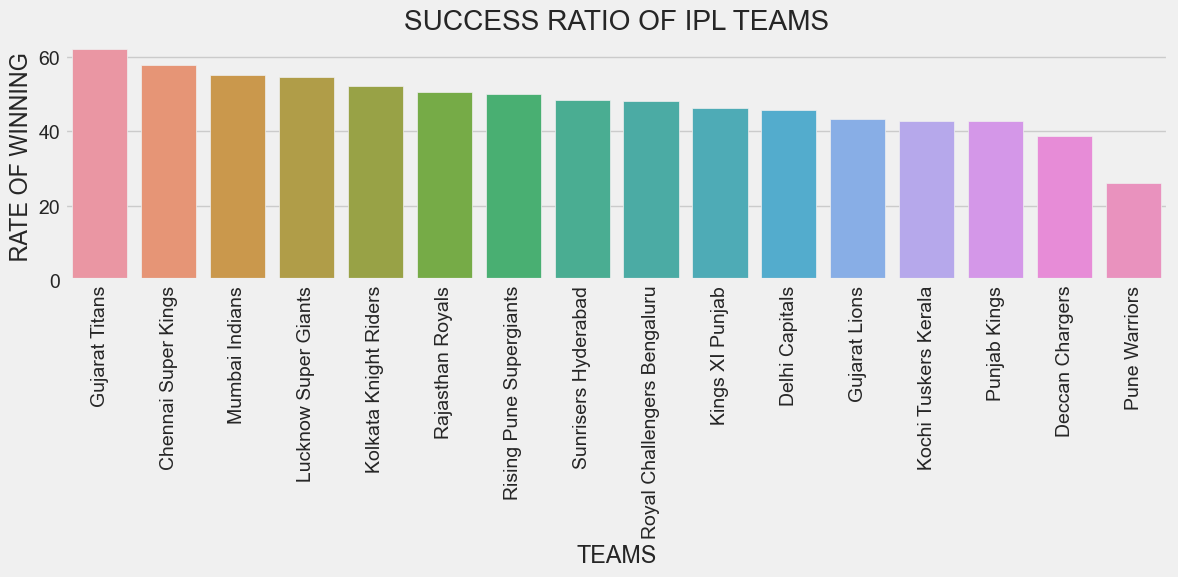

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(x=success_rates_descending.index,y=success_rates_descending.values)
plt.title('SUCCESS RATIO OF IPL TEAMS')
plt.xlabel('TEAMS')
plt.ylabel(' RATE OF WINNING')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Toss decision distribution

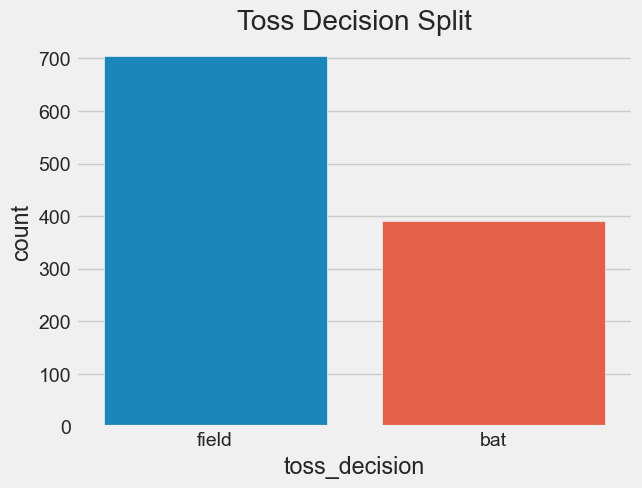

In [40]:
sns.countplot(data=matches, x='toss_decision')
plt.title("Toss Decision Split")
plt.show()

# Result margin distribution

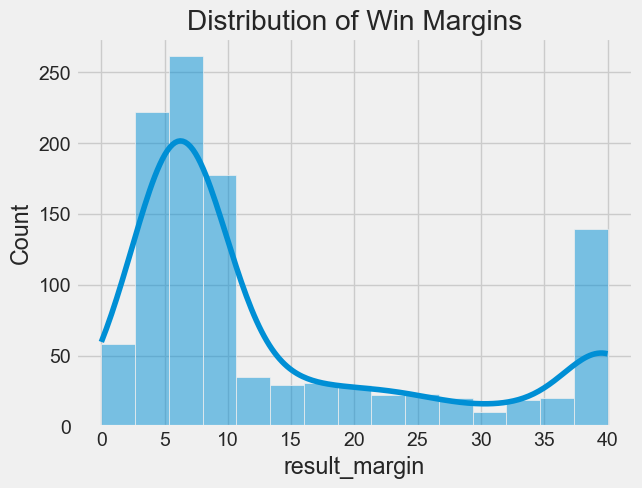

In [41]:
sns.histplot(matches['result_margin'], kde=True)
plt.title("Distribution of Win Margins")
plt.show()

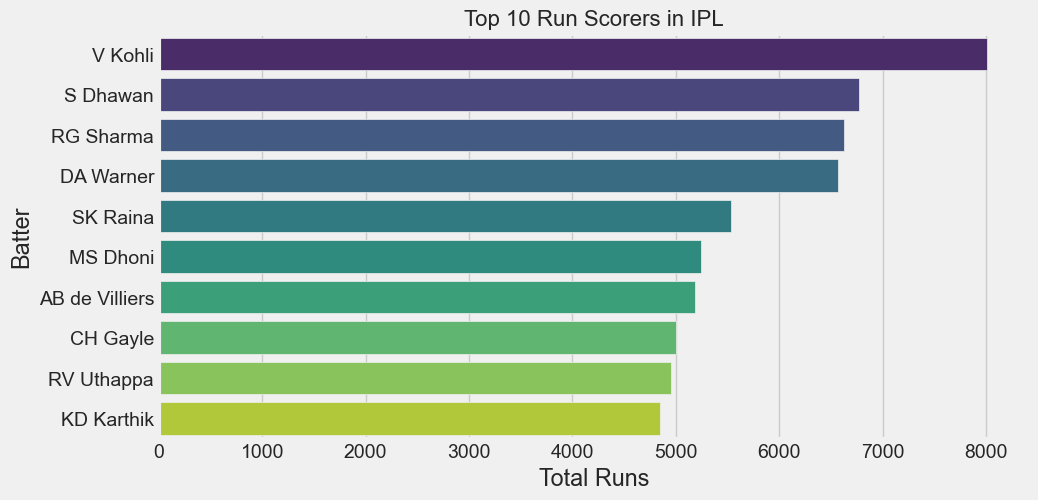

In [100]:
top_batters = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_batters.values, y=top_batters.index, palette='viridis')
plt.title("Top 10 Run Scorers in IPL", fontsize=16)
plt.xlabel("Total Runs")
plt.ylabel("Batter")
plt.show()

## Player of the Match — Top Performers

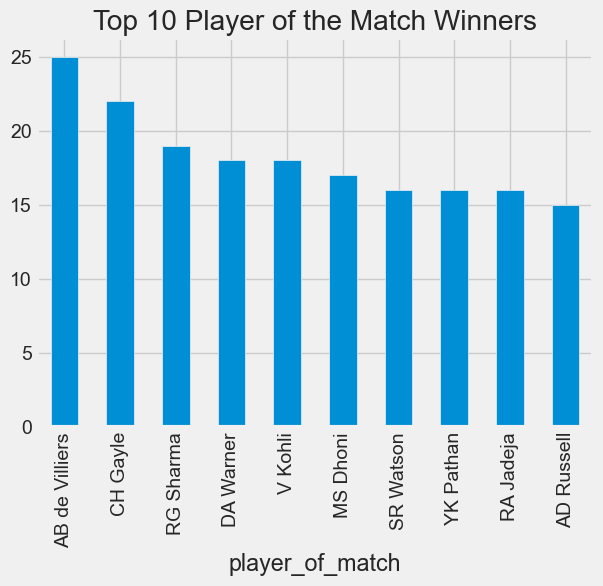

In [42]:
matches['player_of_match'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Player of the Match Winners")
plt.show()


## Venue Distribution

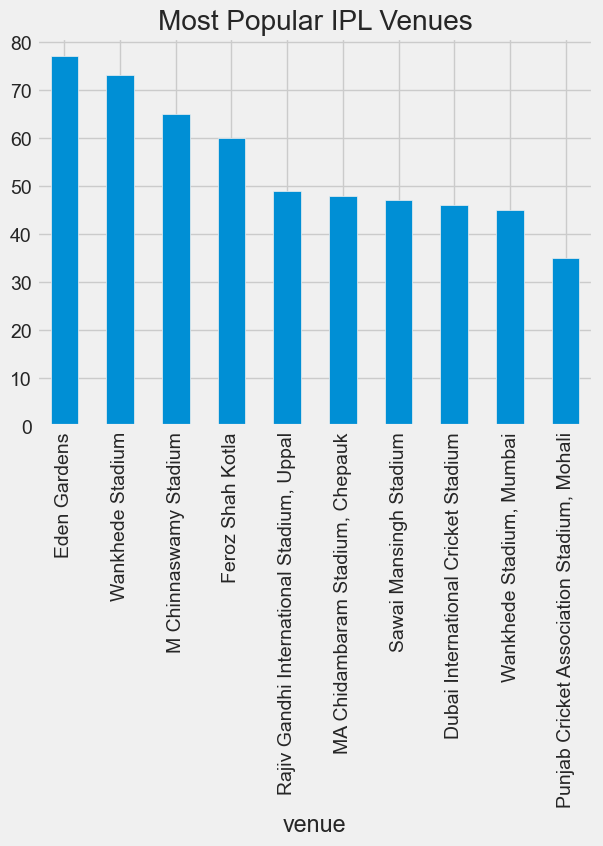

In [43]:
matches['venue'].value_counts().head(10).plot(kind='bar')
plt.title("Most Popular IPL Venues")
plt.show()

## Result Margin Distribution

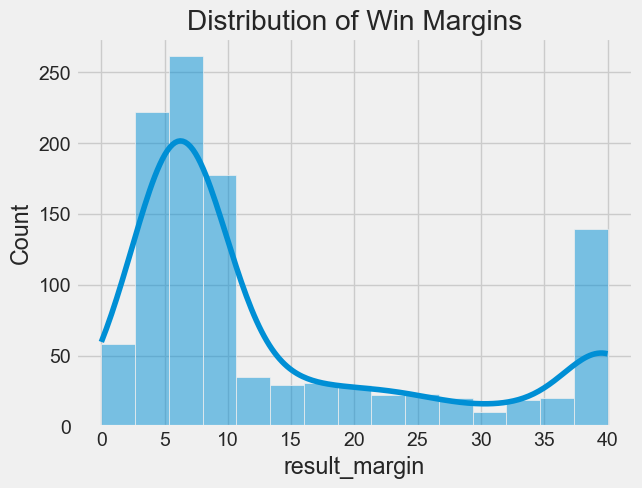

In [44]:
sns.histplot(matches['result_margin'], kde=True)
plt.title("Distribution of Win Margins")
plt.show()

# UNIVARIATE ANALYSIS — DELIVERIES DATASET

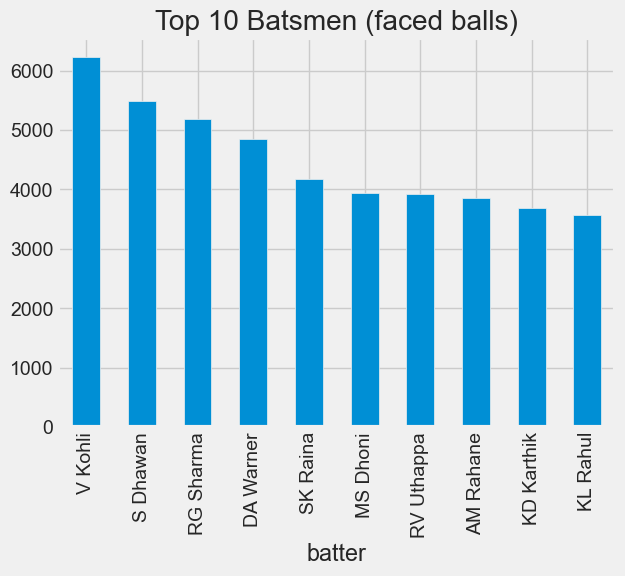

In [105]:
deliveries['batter'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Batsmen (faced balls)")
plt.show()

## TOP BOWLING PERFORMANCES 

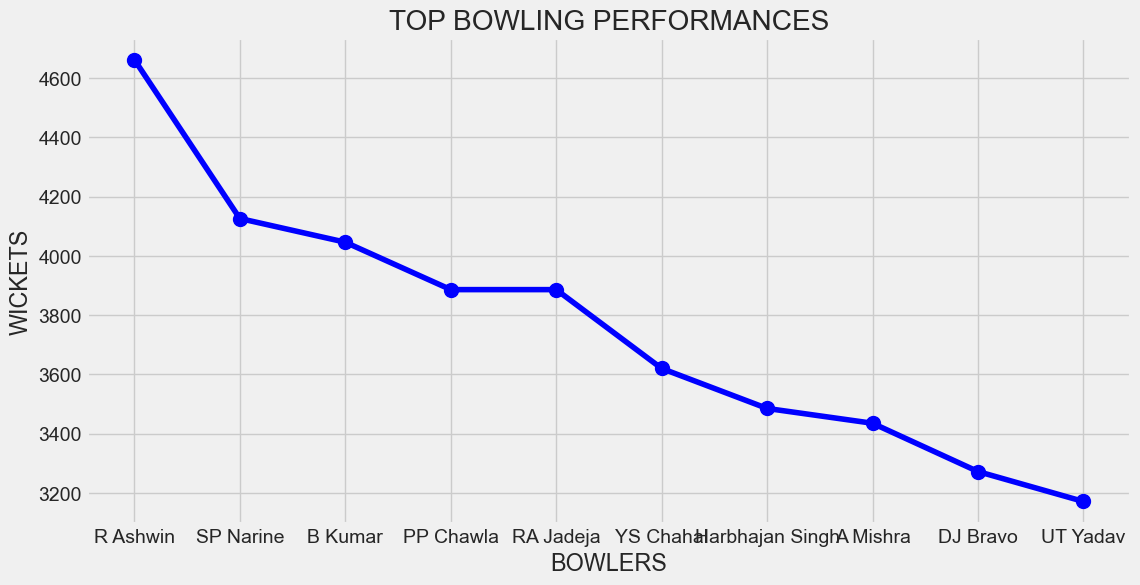

In [102]:
bowling_wickets=deliveries[deliveries['dismissal_kind'] != 'run out']
top_10_bowlers=bowling_wickets.groupby('bowler')['dismissal_kind'].count().reset_index(name='Wickets').sort_values(by='Wickets',ascending=False)[:10]
plt.figure(figsize=(12,6))
plt.plot(top_10_bowlers['bowler'], top_10_bowlers['Wickets'], 
         marker=".", color='blue', ms=20)
plt.title('TOP BOWLING PERFORMANCES')
plt.xlabel('BOWLERS')
plt.ylabel('WICKETS')
plt.show()

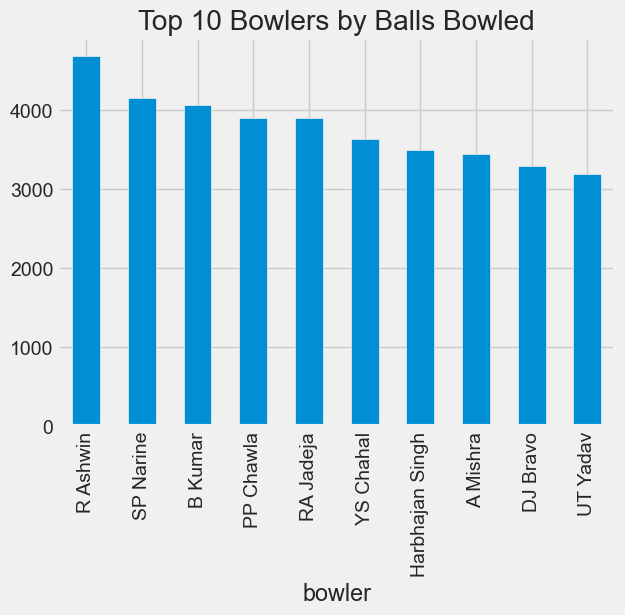

In [50]:
deliveries['bowler'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Bowlers by Balls Bowled")
plt.show()

## The deliveries dataset shows the heartbeat of every IPL match.
Most balls are dots, reflecting good bowling pressure, while boundaries and sixes create impactful moments.
Wides and no-balls are the most frequent extras.
Caught is the dominant dismissal mode, aligning with aggressive T20 batting.
This granular analysis reconstructs the flow of matches ball by ball.

# BIVARIATE ANALYSIS — MATCHES DATASET

### Toss Decision vs Match Winner

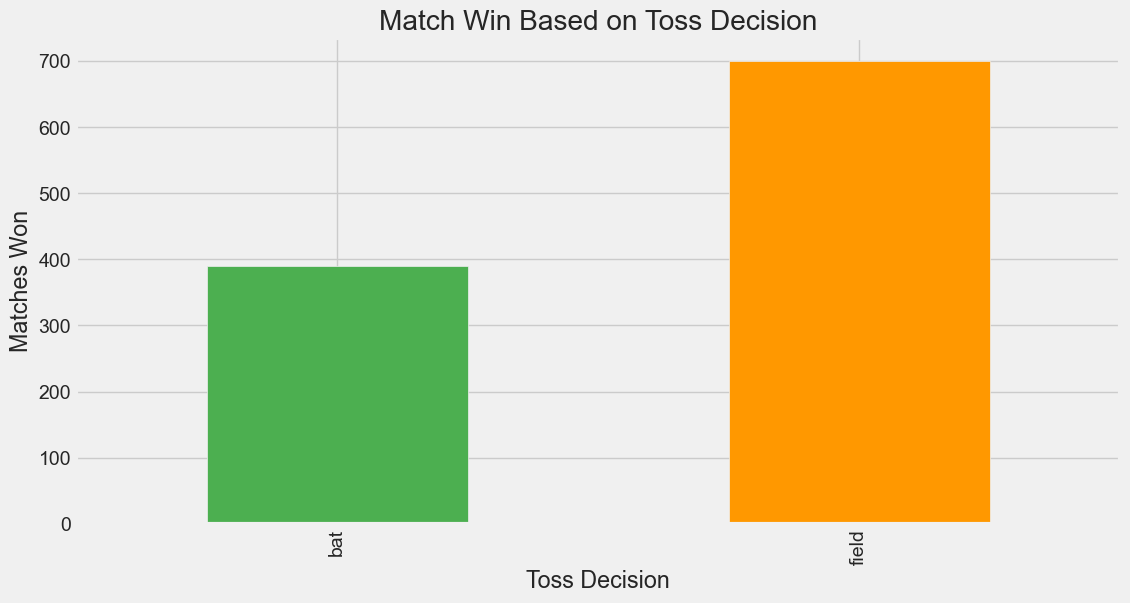

In [59]:
toss_vs_winner = pd.crosstab(matches['toss_decision'], matches['winner'])

plt.figure(figsize=(12,6))
toss_vs_winner.sum(axis=1).plot(kind='bar', color=['#4CAF50', '#FF9800'])
plt.title("Match Win Based on Toss Decision")
plt.ylabel("Matches Won")
plt.xlabel("Toss Decision")
plt.show()


# Batter vs Strike Rate / Runs (Scatter Plot)

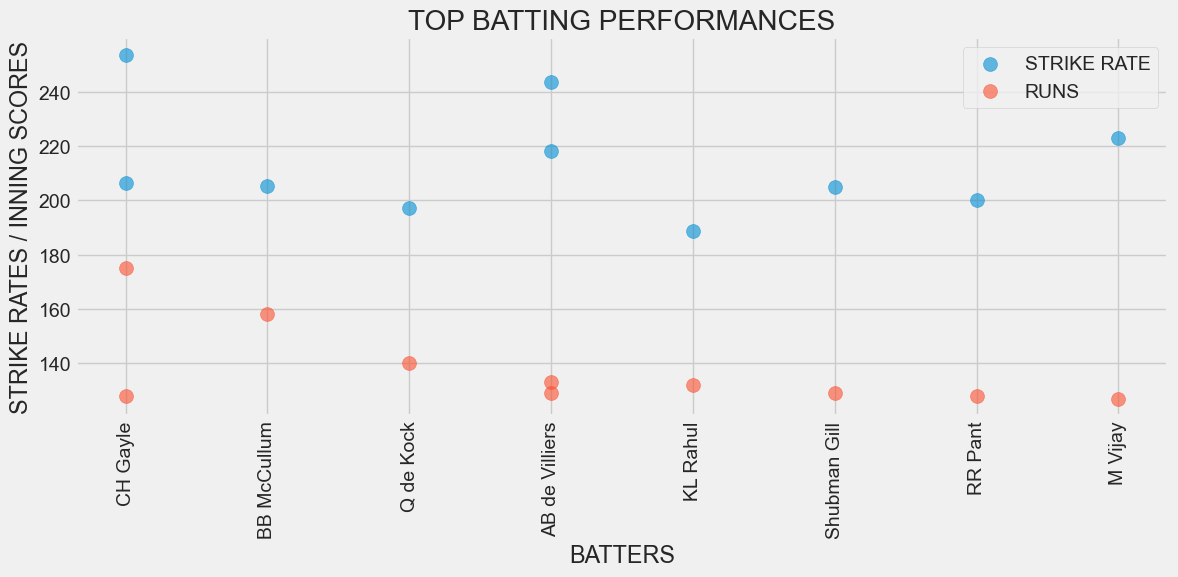

In [104]:
top_performences=deliveries.groupby(['match_id','batter'])['batsman_runs'].sum().reset_index(name='Innings_runs')
top_10_performences=top_performences.sort_values(by='Innings_runs',ascending=False)[:10]
balls_faced=deliveries.groupby(['match_id','batter'])['batsman_runs'].count().reset_index(name='Balls faced')
data_table=pd.merge(top_10_performences,balls_faced,how='inner',on=['match_id','batter'])
data_table['Strike Rate For Matches']=np.round(data_table['Innings_runs']*100/data_table['Balls faced'],2)

plt.figure(figsize=(12,6))
plt.scatter(data_table['batter'], data_table['Strike Rate For Matches'],
            label='STRIKE RATE', s=100, alpha=0.6)
plt.scatter(data_table['batter'], data_table['Innings_runs'],
            label='RUNS', s=100, alpha=0.6)

plt.title('TOP BATTING PERFORMANCES')
plt.xlabel('BATTERS')
plt.ylabel('STRIKE RATES / INNING SCORES')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Top 10 Venues vs Match Winners

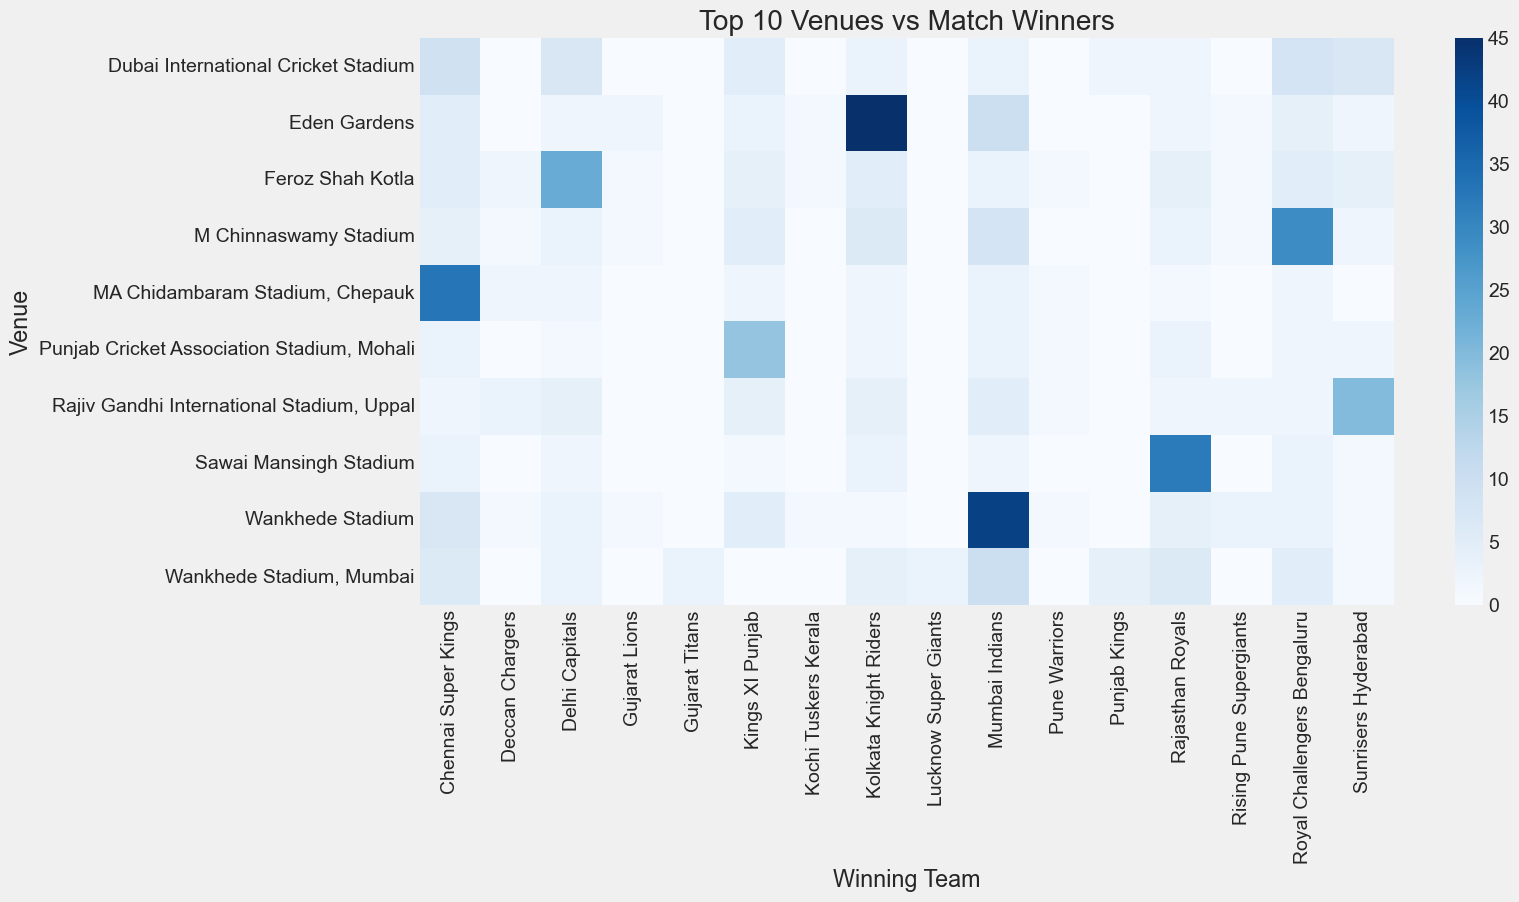

In [67]:
top_venues = matches['venue'].value_counts().head(10).index
venue_data = matches[matches['venue'].isin(top_venues)]

venue_winner = pd.crosstab(venue_data['venue'], venue_data['winner'])

plt.figure(figsize=(14,7))
sns.heatmap(venue_winner, cmap="Blues", annot=False)
plt.title("Top 10 Venues vs Match Winners")
plt.xlabel("Winning Team")
plt.ylabel("Venue")
plt.show()


## BATSMAN vs BOWLER (MATCHUP ANALYSIS)

In [68]:
matchup_runs = deliveries.pivot_table(
    index='batter',
    columns='bowler',
    values='batsman_runs',
    aggfunc='sum',
    fill_value=0
)

In [69]:
wickets = deliveries[deliveries['is_wicket'] == 1] 
matchup_wickets = wickets.pivot_table(
    index='batter',
    columns='bowler',
    values='is_wicket',
    aggfunc='sum',
    fill_value=0
)

In [70]:
top_batsmen = deliveries['batter'].value_counts().head(10).index
top_bowlers = deliveries['bowler'].value_counts().head(10).index

runs_subset = matchup_runs.loc[top_batsmen, top_bowlers]
wickets_subset = matchup_wickets.loc[top_batsmen, top_bowlers]

In [71]:
top_batsmen = deliveries['batter'].value_counts().head(10).index
top_bowlers = deliveries['bowler'].value_counts().head(10).index

runs_subset = matchup_runs.loc[top_batsmen, top_bowlers]
wickets_subset = matchup_wickets.loc[top_batsmen, top_bowlers]

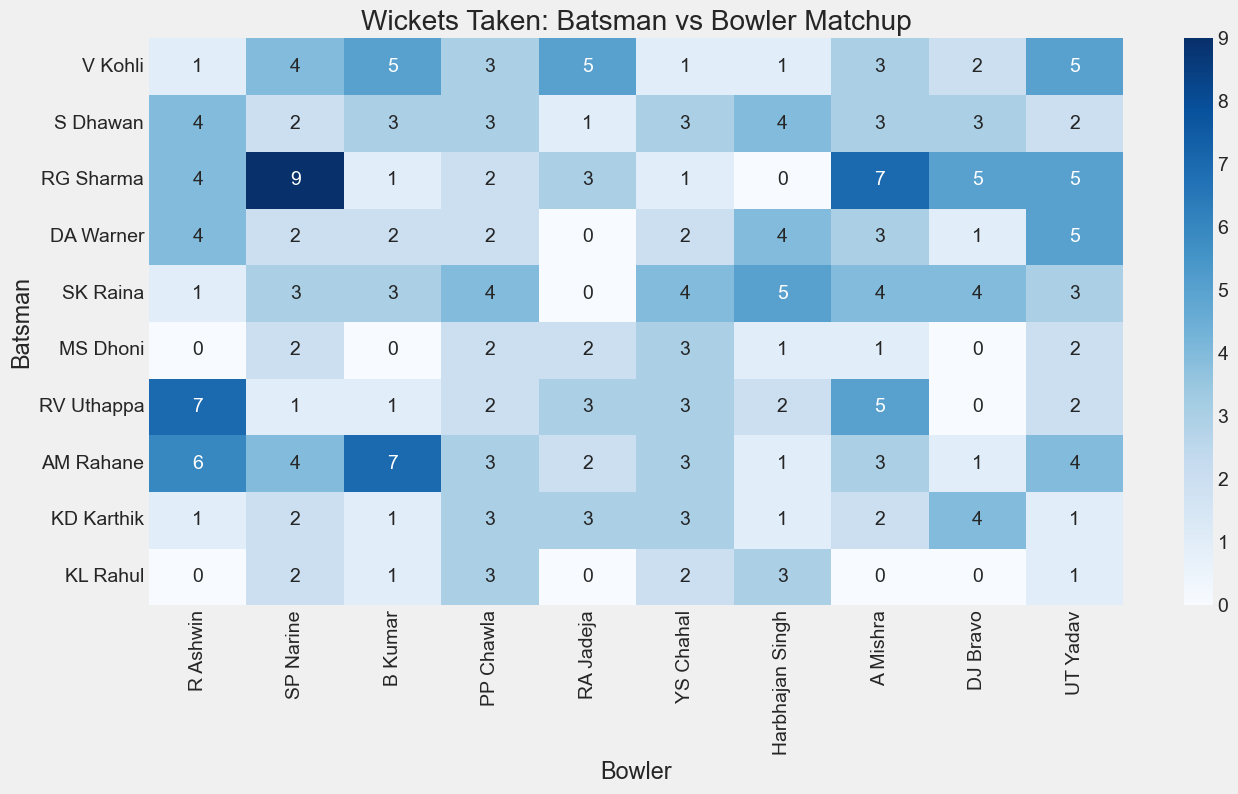

In [73]:
plt.figure(figsize=(14,7))
sns.heatmap(wickets_subset, cmap="Blues", annot=True, fmt='d')
plt.title("Wickets Taken: Batsman vs Bowler Matchup")
plt.xlabel("Bowler")
plt.ylabel("Batsman")
plt.show()

#### Matchup analysis between batsmen and bowlers uncovers tactical micro-battles within a match. Using a heatmap of runs scored, it becomes clear which batsmen dominate certain bowlers, while the dismissal heatmap highlights bowlers who consistently trouble specific batsmen. These insights reflect real on-field strategies—captains set fields and bowlers change lines based on these patterns. This analysis is crucial for identifying key duels, predicting match outcomes, and understanding player strengths and weaknesses.

# Bowler vs Economy Rate

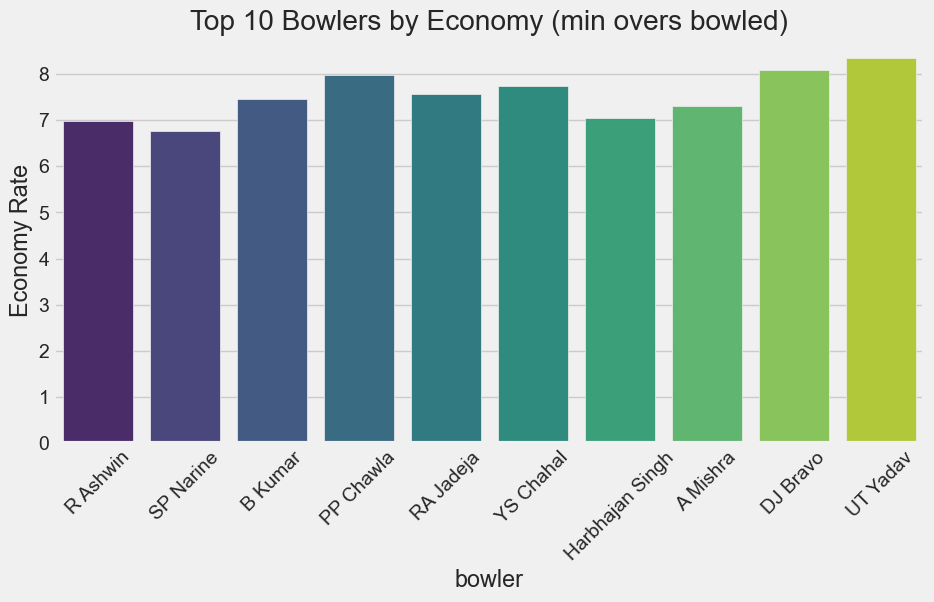

In [74]:
bowler_stats = deliveries.groupby('bowler').agg(
    runs=('total_runs', 'sum'),
    balls=('ball', 'count')
)

bowler_stats['economy'] = (bowler_stats['runs'] / bowler_stats['balls']) * 6

top_bowlers = bowler_stats.sort_values('balls', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_bowlers.index, y=top_bowlers['economy'], palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Bowlers by Economy (min overs bowled)")
plt.ylabel("Economy Rate")
plt.show()

# Batsman vs Strike Rate

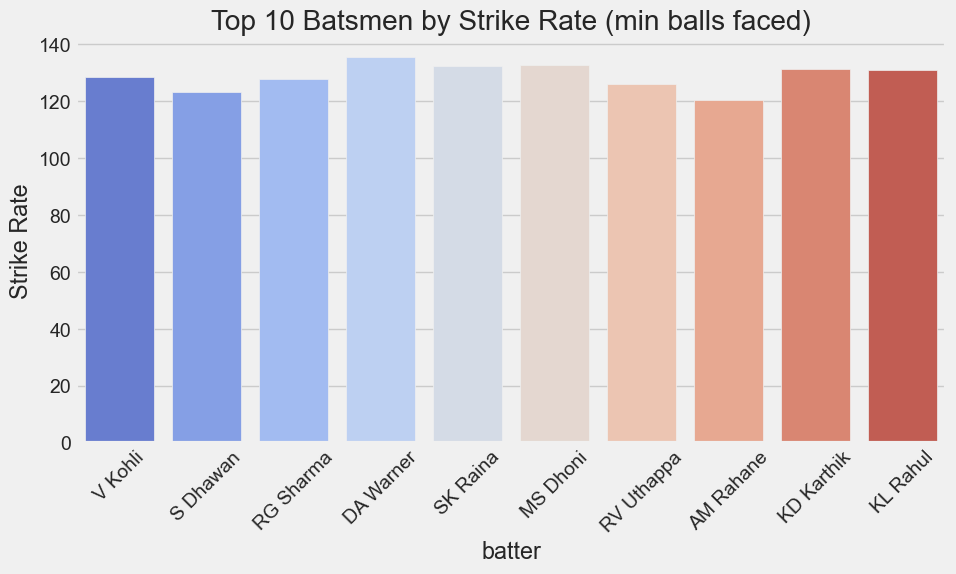

In [75]:
bat_stats = deliveries.groupby('batter').agg(
    runs=('batsman_runs','sum'),
    balls=('ball','count')
)

bat_stats['strike_rate'] = (bat_stats['runs'] / bat_stats['balls']) * 100

top_batsmen = bat_stats.sort_values('balls', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_batsmen.index, y=top_batsmen['strike_rate'], palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 10 Batsmen by Strike Rate (min balls faced)")
plt.ylabel("Strike Rate")
plt.show()

# TOTAL RUNS per Phase

In [84]:
def phase(over):
    if over <= 6:
        return "Powerplay"
    elif over <= 15:
        return "Middle Overs"
    else:
        return "Death Overs"

deliveries['phase'] = deliveries['over'].apply(phase)

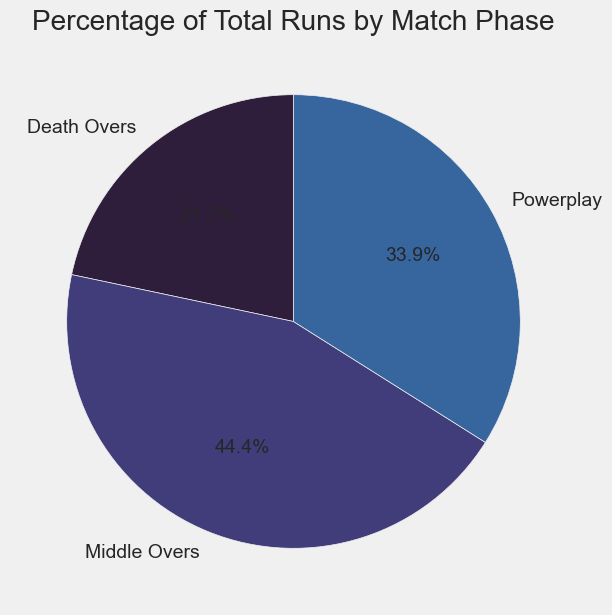

In [85]:
phase_runs_total = deliveries.groupby('phase')['total_runs'].sum()

plt.figure(figsize=(7,7))
plt.pie(
    phase_runs_total,
    labels=phase_runs_total.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('mako')
)
plt.title("Percentage of Total Runs by Match Phase")
plt.show()


## Bivariate analysis on the deliveries dataset uncovered key batting and bowling patterns that define the dynamics of IPL matches. 
Over-wise run and wicket patterns revealed the natural momentum shifts in T20 innings, while matchup analysis provided deep insights into individual player duels. Economy and strike rate charts identified the most influential bowlers and batsmen, respectively. Phase-based analysis using pie charts helped visualize how scoring is distributed across Powerplay, Middle, and Death overs. Together, these insights reveal how tactical decisions, player roles, and game phases interact to shape match outcomes at a granular level.

# MULTIVARIATE ANALYSIS — IPL DATASET

### Multivariate Analysis: Over × Bowler × Runs (Who bowls best in which overs?)

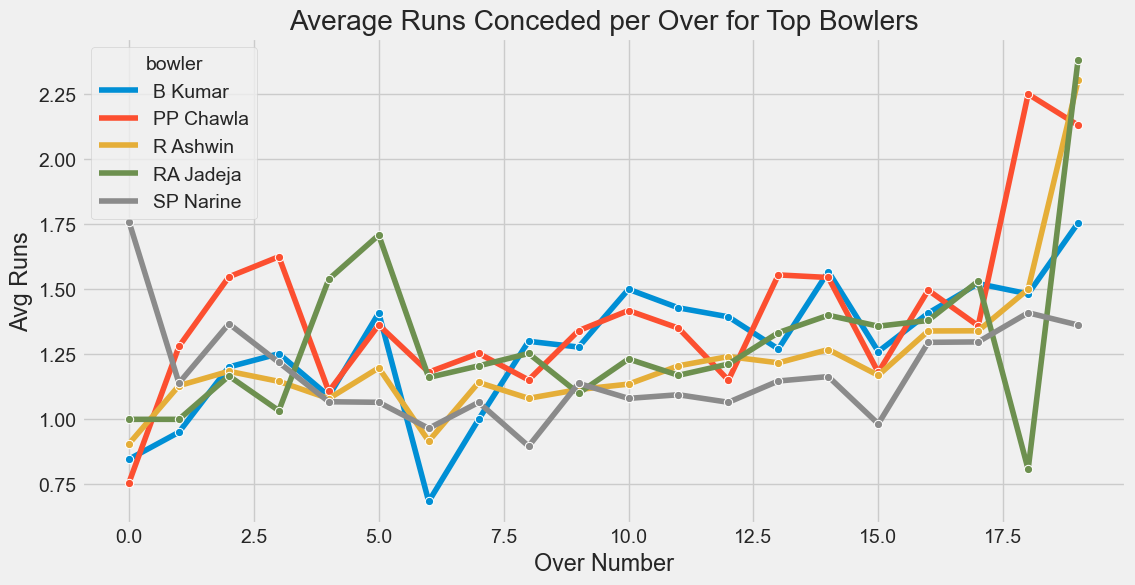

In [86]:
over_bowler = deliveries.groupby(['over', 'bowler'])['total_runs'].mean().reset_index()

top_bowlers = deliveries['bowler'].value_counts().head(5).index
over_bowler_top = over_bowler[over_bowler['bowler'].isin(top_bowlers)]

plt.figure(figsize=(12,6))
sns.lineplot(data=over_bowler_top, x='over', y='total_runs', hue='bowler', marker='o')
plt.title("Average Runs Conceded per Over for Top Bowlers")
plt.ylabel("Avg Runs")
plt.xlabel("Over Number")
plt.show()

### Batsman × Bowler × Dismissal Kind

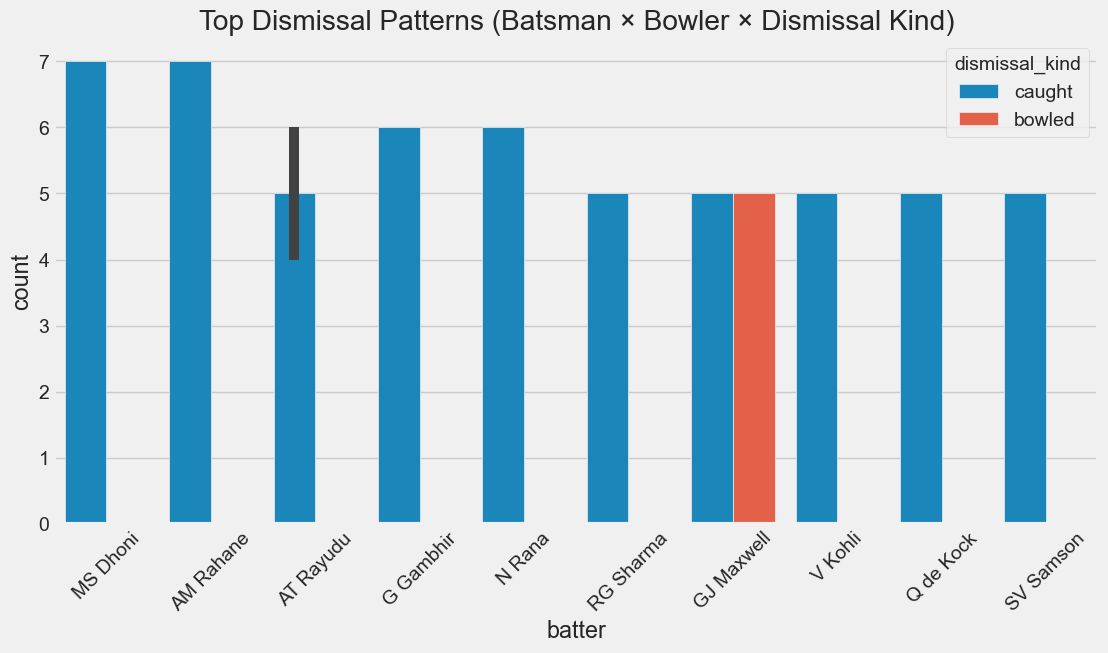

In [87]:
dismissal = deliveries[deliveries['is_wicket'] == 1]

dismissal_kind = dismissal.groupby(['batter', 'bowler', 'dismissal_kind']).size().reset_index(name='count')

top_pairs = dismissal_kind.sort_values('count', ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(data=top_pairs, x='batter', y='count', hue='dismissal_kind')
plt.xticks(rotation=45)
plt.title("Top Dismissal Patterns (Batsman × Bowler × Dismissal Kind)")
plt.show()

### Phase × Bowler Type × Economy

In [88]:
bowler_type = {
    'Jasprit Bumrah':'Fast',
    'Rashid Khan':'Spin',
    'Bhuvneshwar Kumar':'Medium',
    # Add more if you want
}

deliveries['bowler_type'] = deliveries['bowler'].map(bowler_type)

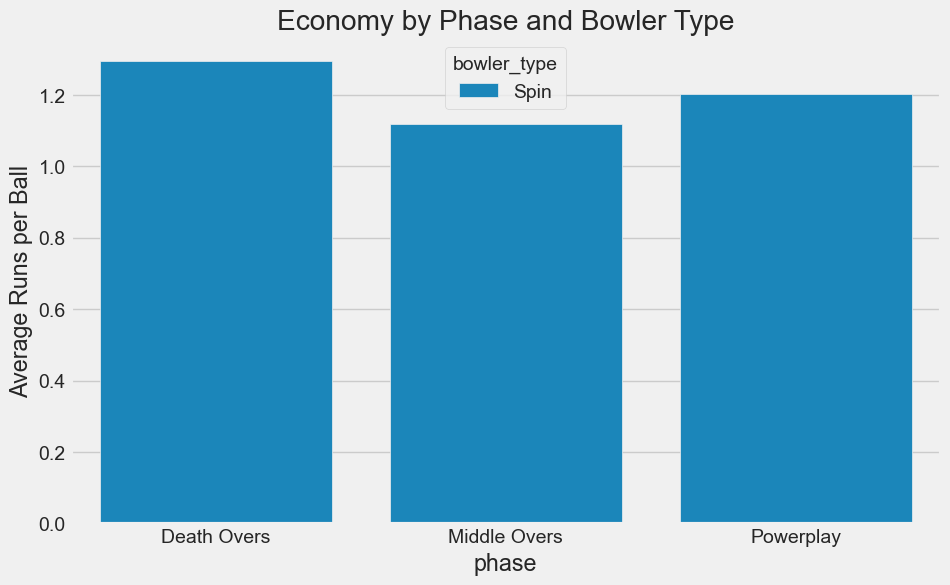

In [89]:
phase_economy = deliveries.groupby(['phase','bowler_type'])['total_runs'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=phase_economy, x='phase', y='total_runs', hue='bowler_type')
plt.title("Economy by Phase and Bowler Type")
plt.ylabel("Average Runs per Ball")
plt.show()


### Phase × Team × Average Runs

In [91]:
def phase(over):
    if over <= 6:
        return "Powerplay"
    elif over <= 15:
        return "Middle Overs"
    else:
        return "Death Overs"

deliveries['phase'] = deliveries['over'].apply(phase)


In [92]:
phase_team_runs = deliveries.groupby(['batting_team','phase'])['total_runs'].mean().reset_index()

In [94]:
heat = phase_team_runs.pivot(index='batting_team', columns='phase', values='total_runs')

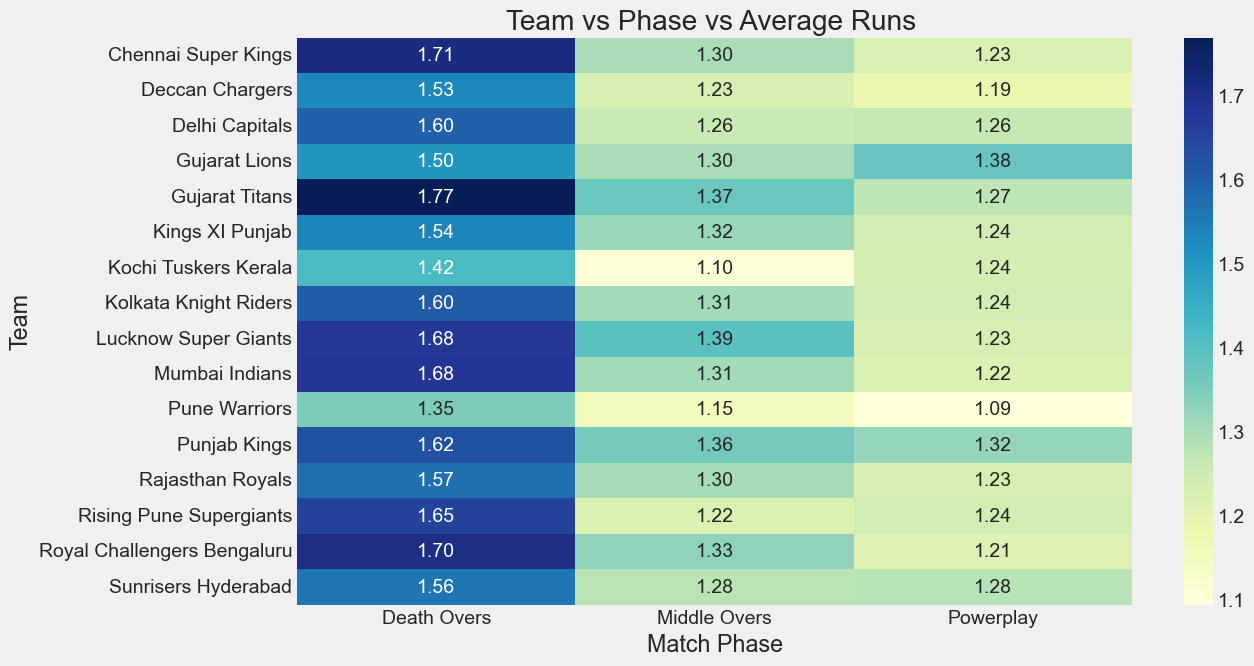

In [96]:
plt.figure(figsize=(12,7))
sns.heatmap(heat, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Team vs Phase vs Average Runs ")
plt.xlabel("Match Phase")
plt.ylabel("Team")
plt.show()

### The multivariate heatmap of Team × Phase × Average Runs provides a comprehensive view of how each IPL team approaches different stages of an innings.
This visualization highlights aggressive starters, middle-overs stabilizers, and strong death-over finishers, offering deep tactical understanding of team behavior. By capturing three dimensions in a single view, the heatmap presents a strategic fingerprint of every team, similar to analyses used by professional IPL data analysts and commentators

## Cleaned and prepared the data Visualized key distributions and trends

Uncovered relationships at match, over, player, and phase levels

Identified strategic patterns used by IPL teams

Provided a foundation for predictive modeling and advanced analytics

The IPL is a data-rich league, and this analysis demonstrates how ball-by-ball information can uncover deep insights about team behavior, player performance, and match strategy.